In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('C:/Users/pc/Desktop/New folder/DataAnalysisTerm/fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

In [10]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [11]:
dft = df.copy()
dft

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [7]:
dft.dtypes

value    int64
dtype: object

In [26]:
dft = dft[df['value'].between(dft['value'].quantile(.025), dft['value'].quantile(.975))]
dft

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


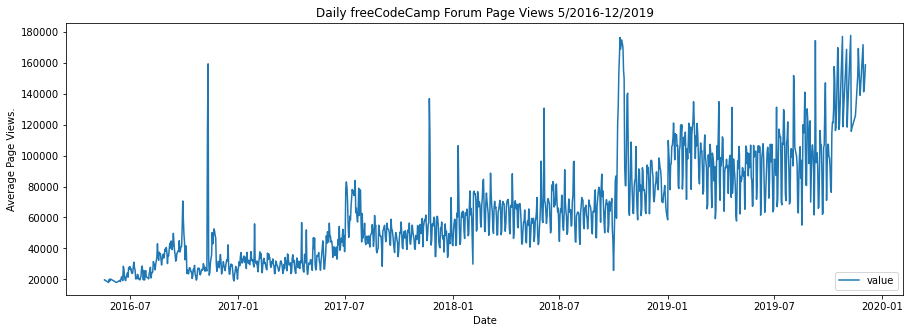

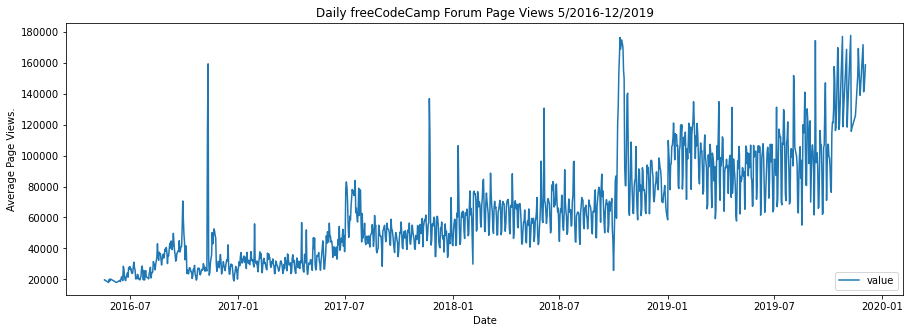

In [29]:
def draw_line_plot():
    fig, ax=plt.subplots(figsize=(15, 5))
    sns.lineplot(data=dft, legend="brief")
    plt.xlabel('Date')
    plt.ylabel('Average Page Views.')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.legend(loc=4)
   # plt.legend(loc=1, title='Months')
    fig.savefig('lineplot.png')
    return fig
    
draw_line_plot()

In [30]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


(<Figure size 1080x360 with 1 Axes>,
 <AxesSubplot:xlabel='year', ylabel='value'>)

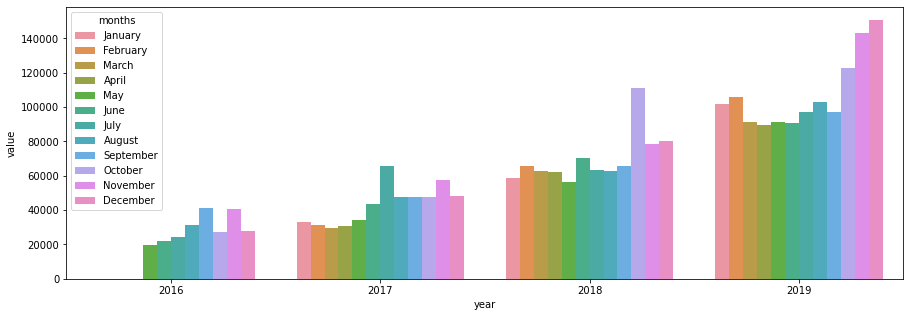

In [41]:
def draw_bar_plot():
    dfb = dft.copy()
    dfb['year'] = dfb.index.year.values
    dfb['months'] = dfb.index.month_name()
    fig = plt.subplots(figsize=(15,5))
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    
    
    
    #plt.legend(title='Months', loc=4)
    
    sns.barplot(data=dfb, hue='months', hue_order=months, x='year', y='value', ci=None)
    return fig
draw_bar_plot()
    
    

In [ ]:
def draw_boxplot():
    

In [44]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = dft.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    df_box['monthnumber'] = dft.index.month
    df_box = df_box.sort_values('monthnumber')
    fig, ax = plt.subplots(1,2,figsize=(16,6))
    sns.boxplot(y = "value", x = "year", data = df_box, ax = ax[0] ) 
    ax[0].set(xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)")
    sns.boxplot(y = "value", x = "month", data = df_box, ax = ax[1])
    ax[1].set(xlabel="Month", ylabel="Page Views", title="Month-wise Box Plot (Seasonality)")
    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

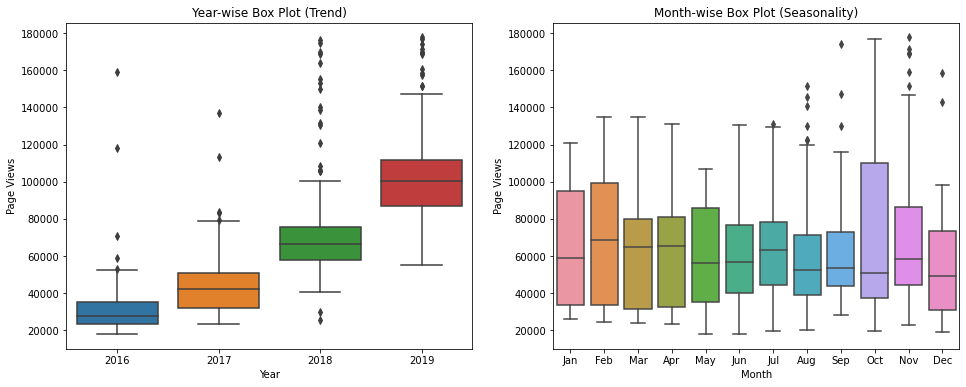

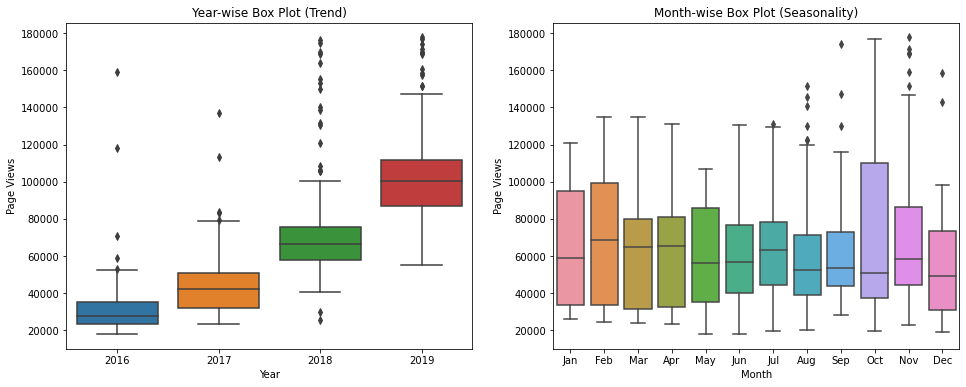

In [45]:
draw_box_plot()